<a href="https://colab.research.google.com/github/anonymousgeek17/TSF/blob/main/Stocks_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Stock Market Prediction using Machine Learning**

In [ ]:
!pip install yfinance 
!pip install yahoofinancials

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.3 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for yahoofinancials: filename=yahoofinancials-1.6-py3-none-any.whl size=15190 sha256=411280e8e3ae78b30c72e6beca7ec99e8317d7753074e3b08ca3be3f53ea38be
  Stored in directory: /root/.cache/pip/wheels/6a/90/0c/08c7ac2ce60b9ac91529417d471e59244f9f96848c86f14809
Successfully built yahoofinancials


In [ ]:
import os
import sys
import numpy as np
import pandas as pd
import datetime
import yfinance as yf

import matplotlib.pyplot as plt
%matplotlib inline

### **Data Anaysis**

In [ ]:
start_date = datetime.datetime(2000, 1, 1).date()
end_date = datetime.datetime.now().date()
start_date, end_date

(datetime.date(2000, 1, 1), datetime.date(2022, 12, 14))

In [ ]:
end_date - start_date

datetime.timedelta(days=8383)

In [ ]:
ticker = "GOOGL"
#ticker = "MSFT"
#ticker = "FB"

In [ ]:
googl = yf.Ticker(ticker)
googl

yfinance.Ticker object <GOOGL>

In [ ]:
googl.info

{'zip': '94043',
 'sector': 'Communication Services',
 'fullTimeEmployees': 186779,
 'longBusinessSummary': 'Alphabet Inc. provides various products and platforms in the United States, Europe, the Middle East, Africa, the Asia-Pacific, Canada, and Latin America. It operates through Google Services, Google Cloud, and Other Bets segments. The Google Services segment offers products and services, including ads, Android, Chrome, hardware, Gmail, Google Drive, Google Maps, Google Photos, Google Play, Search, and YouTube. It is also involved in the sale of apps and in-app purchases and digital content in the Google Play store; and Fitbit wearable devices, Google Nest home products, Pixel phones, and other devices, as well as in the provision of YouTube non-advertising services. The Google Cloud segment offers infrastructure, platform, and other services; Google Workspace that include cloud-based collaboration tools for enterprises, such as Gmail, Docs, Drive, Calendar, and Meet; and other se

In [ ]:
historical_data = googl.history(start=start_date, end=end_date, interval="1d").reset_index()
historical_data.shape

(4613, 8)

In [ ]:
# The Total size of the Historical Data Extracted is - 4613 Rows & 8 Columns

**The Data Represented throughout of Stock Prices are on Per Day Basis.**

- High: Maximum Stock Price on that Particular Day.

- Low: Lowest Stock Price went on that Particular Day.

- Open: Stock Price Opening on that Particular Day.

- Close: Final Closing Price of the Stock on that Particular Day.

- Volume: Amount of Stock Traded on that Particular Day.

- Dividends: Dividens given (if any).

- Stock Splits: Stock Splits happen on that Particular Day (if any).

In [ ]:
historical_data.head(10)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2004-08-19 00:00:00-04:00,2.502503,2.604104,2.401401,2.511011,893181924,0,0.0
1,2004-08-20 00:00:00-04:00,2.527778,2.729730,2.515015,2.710460,456686856,0,0.0
2,2004-08-23 00:00:00-04:00,2.771522,2.839840,2.728979,2.737738,365122512,0,0.0
3,2004-08-24 00:00:00-04:00,2.783784,2.792793,2.591842,2.624374,304946748,0,0.0
4,2004-08-25 00:00:00-04:00,2.626627,2.702703,2.599600,2.652653,183772044,0,0.0
5,2004-08-26 00:00:00-04:00,2.626376,2.701451,2.619119,2.700450,141897960,0,0.0
6,2004-08-27 00:00:00-04:00,2.705205,2.718218,2.644895,2.656406,124235640,0,0.0
7,2004-08-30 00:00:00-04:00,2.634635,2.639890,2.552803,2.552803,103935960,0,0.0
8,2004-08-31 00:00:00-04:00,2.560060,2.595345,2.556557,2.561812,98357544,0,0.0
9,2004-09-01 00:00:00-04:00,2.570070,2.576827,2.494244,2.508759,182765052,0,0.0


In [ ]:
historical_data.tail(10)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
4603,2022-11-30 00:00:00-05:00,94.820000,101.040001,94.419998,100.989998,43592300,0,0.0
4604,2022-12-01 00:00:00-05:00,101.019997,102.250000,100.250000,100.989998,28687100,0,0.0
4605,2022-12-02 00:00:00-05:00,99.050003,100.769997,98.900002,100.440002,21469400,0,0.0
4606,2022-12-05 00:00:00-05:00,99.400002,101.379997,99.000000,99.480003,24405100,0,0.0
4607,2022-12-06 00:00:00-05:00,99.300003,99.779999,96.419998,96.980003,24910700,0,0.0
4608,2022-12-07 00:00:00-05:00,96.410004,96.879997,94.720001,94.940002,31045400,0,0.0
4609,2022-12-08 00:00:00-05:00,95.379997,95.580002,93.449997,93.709999,32213300,0,0.0
4610,2022-12-09 00:00:00-05:00,93.769997,94.260002,92.750000,92.830002,28210600,0,0.0
4611,2022-12-12 00:00:00-05:00,92.709999,93.559998,91.610001,93.309998,29420000,0,0.0
4612,2022-12-13 00:00:00-05:00,97.760002,99.529999,95.029999,95.629997,40553700,0,0.0


In [ ]:
#Statistical Representation of Data [Mean, SD, Percentile, Coutnt, etc...]
historical_data.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,4613.000000,4613.000000,4613.000000,4613.000000,4.613000e+03,4613.0,4613.000000
mean,37.629328,38.010980,37.231442,37.627494,1.251390e+08,0.0,0.004769
std,34.941649,35.318311,34.551242,34.938528,1.518995e+08,0.0,0.295928
min,2.482232,2.546046,2.401401,2.502753,9.312000e+06,0.0,0.000000
25%,12.638388,12.762763,12.460711,12.636386,3.315200e+07,0.0,0.000000
50%,23.130630,23.222471,22.930429,23.098099,7.079314e+07,0.0,0.000000
75%,53.950001,54.421001,53.334000,53.903999,1.540938e+08,0.0,0.000000
max,151.250000,151.546494,148.899002,149.838501,1.643023e+09,0.0,20.000000


In [ ]:
historical_data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits'],
      dtype='object')

In [ ]:
historical_data.nunique()

Date            4613
Open            4494
High            4458
Low             4501
Close           4532
Volume          4492
Dividends          1
Stock Splits       3
dtype: int64

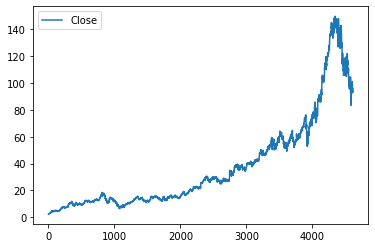

In [ ]:
fig = plt.figure()
plt.plot(historical_data.Close)
plt.legend(["Close", "Open"])

### **Data Cleaning**

In [ ]:
# Delete unnecessary columns

historical_data.drop(historical_data.columns.difference(['Date', 'Open', 'Close']), 1, inplace=True)

<ipython-input-19-353ddb849f0d>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  historical_data.drop(historical_data.columns.difference(['Date', 'Open', 'Close']), 1, inplace=True)


In [ ]:
historical_data.head(10)

,Date,Open,Close
0,2004-08-19 00:00:00-04:00,2.502503,2.511011
1,2004-08-20 00:00:00-04:00,2.527778,2.710460
2,2004-08-23 00:00:00-04:00,2.771522,2.737738
3,2004-08-24 00:00:00-04:00,2.783784,2.624374
4,2004-08-25 00:00:00-04:00,2.626627,2.652653
5,2004-08-26 00:00:00-04:00,2.626376,2.700450
6,2004-08-27 00:00:00-04:00,2.705205,2.656406
7,2004-08-30 00:00:00-04:00,2.634635,2.552803
8,2004-08-31 00:00:00-04:00,2.560060,2.561812
9,2004-09-01 00:00:00-04:00,2.570070,2.508759


In [ ]:
historical_data.tail(10)

,Date,Open,Close
4603,2022-11-30 00:00:00-05:00,94.820000,100.989998
4604,2022-12-01 00:00:00-05:00,101.019997,100.989998
4605,2022-12-02 00:00:00-05:00,99.050003,100.440002
4606,2022-12-05 00:00:00-05:00,99.400002,99.480003
4607,2022-12-06 00:00:00-05:00,99.300003,96.980003
4608,2022-12-07 00:00:00-05:00,96.410004,94.940002
4609,2022-12-08 00:00:00-05:00,95.379997,93.709999
4610,2022-12-09 00:00:00-05:00,93.769997,92.830002
4611,2022-12-12 00:00:00-05:00,92.709999,93.309998
4612,2022-12-13 00:00:00-05:00,97.760002,95.629997


### **Data Visualisation**

In [ ]:
import seaborn as sns

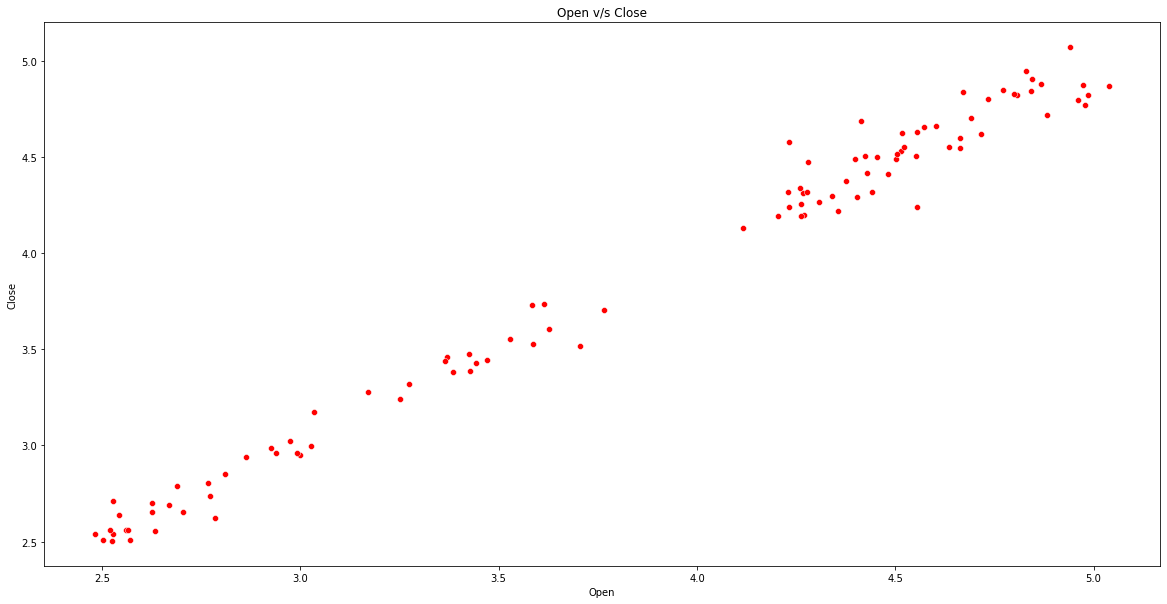

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
plot1 = sns.scatterplot(data=historical_data.head(100), x="Open", y="Close", ax=ax, color='red')
plot1.set(title='Open v/s Close')
plt.show()

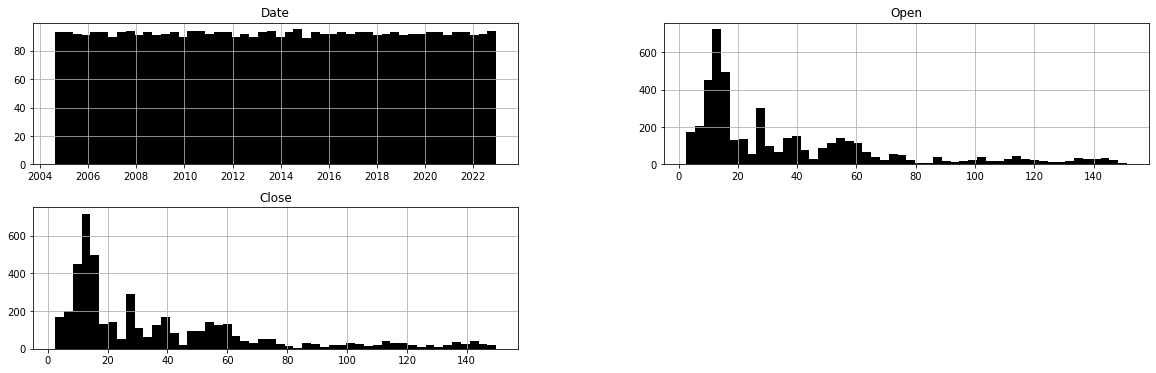

In [ ]:
historical_data.hist(bins=50, figsize=(20, 6), color='black')
plt.show()

In [ ]:
#Importing Model
from sklearn.linear_model import LinearRegression

### **Building, Predicting and Evaluating the Model**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

**- Simple Linear Regression**

In [ ]:
X = historical_data['Open'].values
y = historical_data['Close'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3)

In [ ]:
model_1 = LinearRegression()
build_1 = model_1.fit(X_train.reshape(-1, 1), y_train)
predict_1 = model_1.predict(X_test.reshape(-1, 1))

In [ ]:
print("Co-efficient: ", model_1.coef_)
print("\nIntercept: ", model_1.intercept_)

Co-efficient:  [0.99966586]

Intercept:  0.007142275772032747


In [ ]:
df_1 = pd.DataFrame(list(zip(y_test, predict_1)), columns=["Actual Values", "Predicted Values"])

In [ ]:
df_1.head().style.hide_index()

Actual Values,Predicted Values
16.191692,16.193674
60.645500,60.413449
27.543043,27.232777
72.001503,71.745660
9.637137,9.646312


In [ ]:
df_1.tail().style.hide_index()

Actual Values,Predicted Values
15.615365,15.697093
25.678429,25.811829
11.684184,11.675164
10.825826,10.920162
13.195445,13.059336


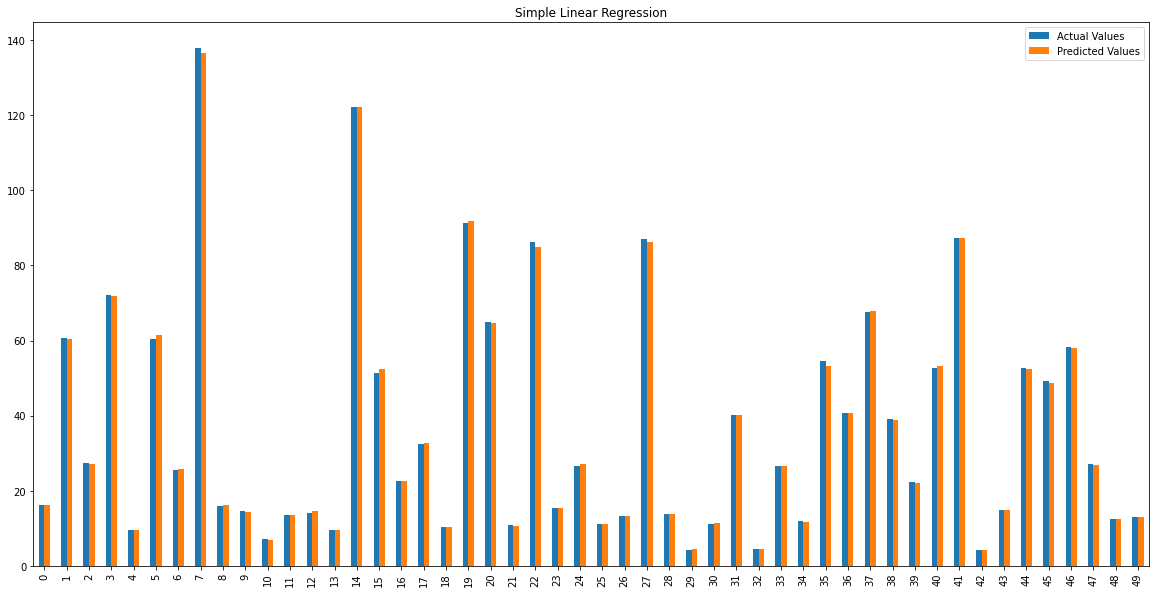

In [ ]:
df_1.head(50).plot(kind="bar", figsize=(20, 10), title='Simple Linear Regression')
plt.show()

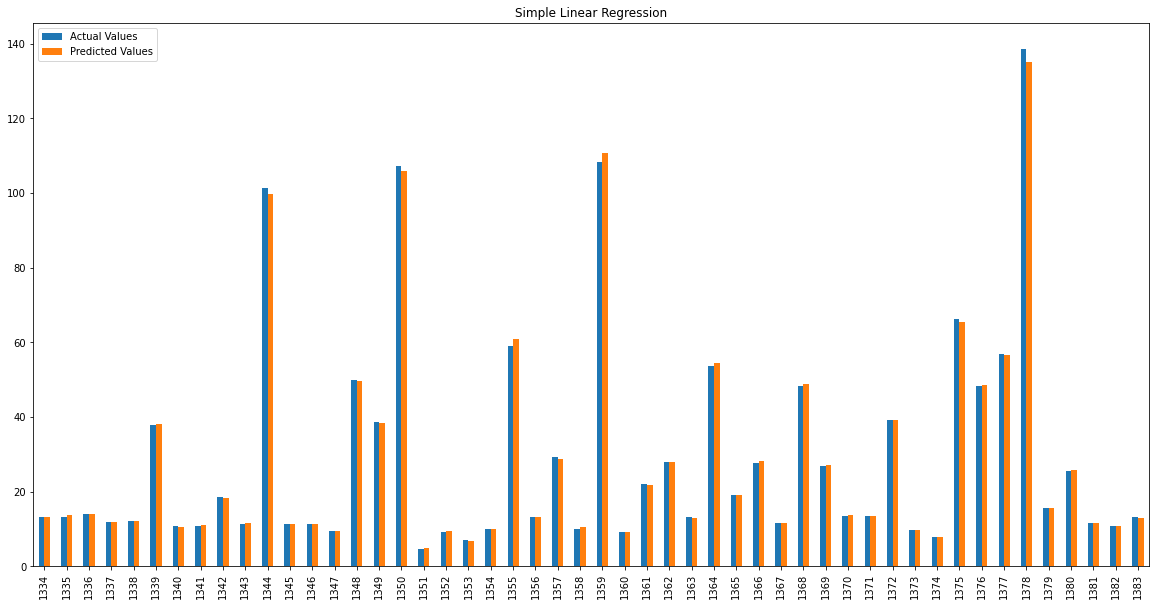

In [ ]:
df_1.tail(50).plot(kind="bar", figsize=(20, 10), title='Simple Linear Regression')
plt.show()

In [ ]:
accuracy_1 = r2_score(y_test, predict_1)
print("Accuracy of Simple Linear Regression:", accuracy_1)

Accuracy of Simple Linear Regression: 0.9994807563395269


### **Model Visualisation**

In [ ]:
dict_1 = {
    "Model": ["Simple Linear Regression"],
    "Accuracy": np.array([accuracy_1])
}
df = pd.DataFrame(dict_1)
display(df.style.hide_index())

Model,Accuracy
Simple Linear Regression,0.999481


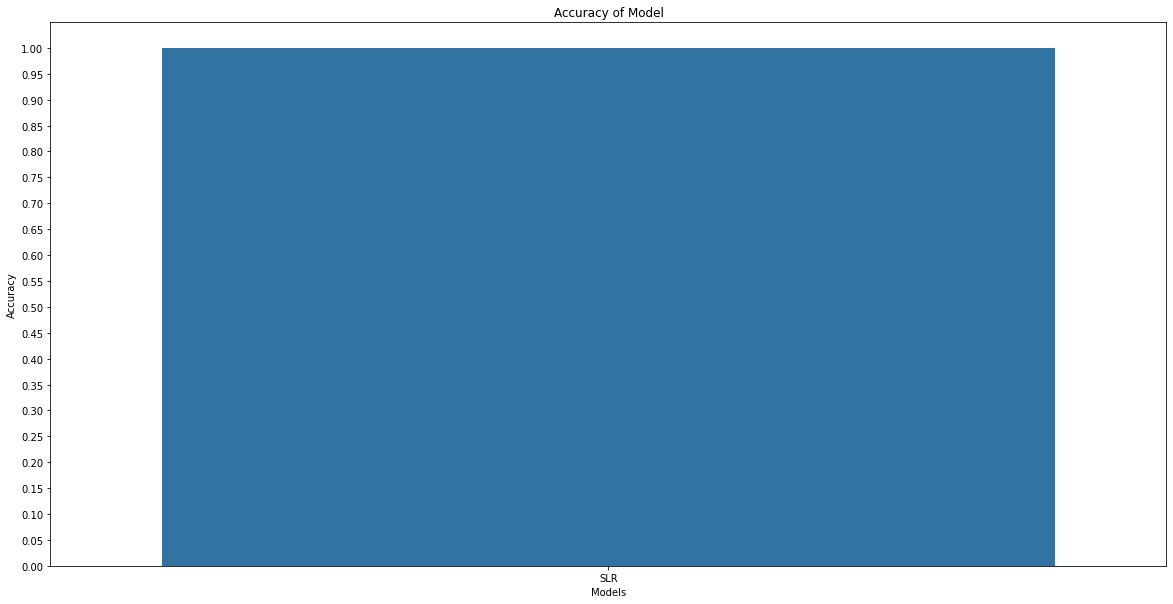

In [ ]:
models = ['SLR']
acc = [accuracy_1]
plt.figure(figsize=(20, 10))
plt.title('Accuracy of Model')
plt.yticks(np.linspace(0,1,21))
plt.ylabel("Accuracy")
plt.xlabel("Models")
values = df.Accuracy
plot = sns.barplot(x=models, y=acc, data=values, errwidth=0)
plt.show()

In [ ]:
new_dict = {
    'Date': np.array(['14-December-22']),
    'Open':np.array([95.63])}

future_stock_value = pd.DataFrame(new_dict)
display(future_stock_value.style.hide_index())

Date,Open
14-December-22,95.630000


In [ ]:
models = np.array(df['Model'])
accuracy = np.array(df['Accuracy'])

In [ ]:
highest_accuracy=0.0
best_model=""

In [ ]:
for i in range(len(accuracy)) :
    if accuracy[i] >= highest_accuracy :
        highest_accuracy=accuracy[i]
        best_model=models[i]

In [ ]:
slr = []

if best_model == models[0] :
    future_stock_value['Predicted'] = model_1.predict(future_stock_value.Open.values.reshape(-1, 1))

In [ ]:
display(future_stock_value.style.hide_index())

Date,Open,Predicted
14-December-22,95.630000,95.605188
